<a href="https://colab.research.google.com/github/Ichchha-coder/Projects_/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("updated_scores.csv")

In [ ]:
df.head()

,Full_Name,Section,Score,Remarks,Explanation
0,Ajar Shrestha,C11,7,Average,The student has an average performance but the...
1,Sandhya Dumre,C11,9,Good,The student performed well and demonstrates go...
2,Riya Joshi,C11,6,Average,The student has an average performance but the...
3,Aditya Raut,C11,7,Average,The student has an average performance but the...
4,Manisha Shah,C11,9,Good,The student performed well and demonstrates go...


In [ ]:
names_scores = list(df[df['Score'] <= 4][['Full_Name', 'Score']].itertuples(index=False, name=None))
print(names_scores)


[('Sadique Akbar', 4), ('Anju Yadav', 3), ('Himal Pandey', 4), ('Om Prakash Yadav', 0), ('Roshan Jaiswal', 0), ('Nitesh Raut', 0)]


In [ ]:
# Define your custom remark order
remark_order = ['Absent', 'Unsatisfactory', 'Average', 'Good', 'Excellent']

# Count and reorder using Categorical
remark_counts = df['Remarks'].value_counts().reindex(remark_order, fill_value=0).reset_index()
remark_counts.columns = ['Remarks', 'Number of Students']

# Display
print(remark_counts)


          Remarks  Number of Students
0          Absent                   3
1  Unsatisfactory                   3
2         Average                  19
3            Good                  10
4       Excellent                   0


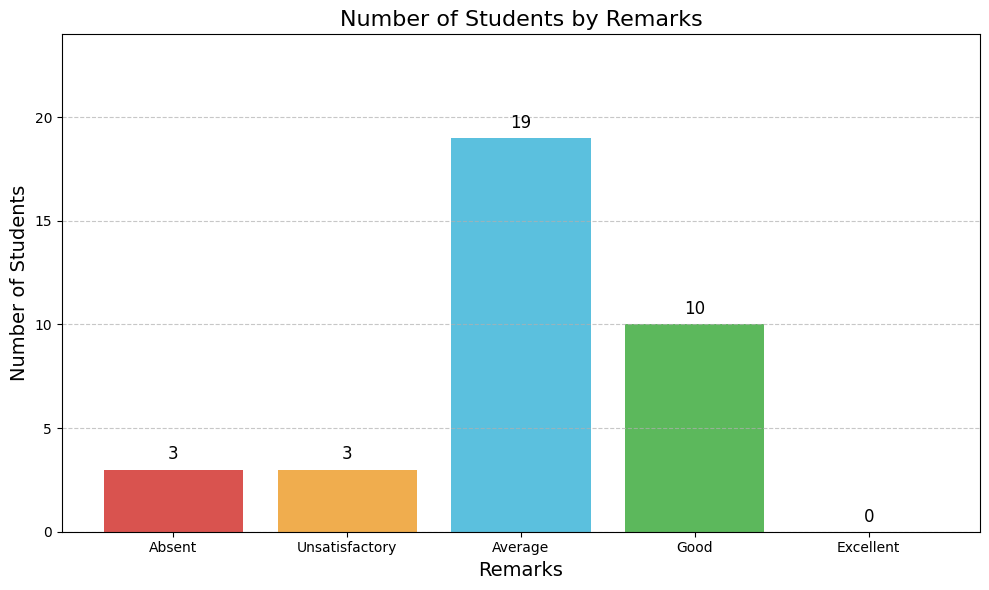

In [ ]:
import matplotlib.pyplot as plt

# Data
remarks = ['Absent', 'Unsatisfactory', 'Average', 'Good', 'Excellent']
student_counts = [3, 3, 19, 10, 0]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(remarks, student_counts, color=['#d9534f', '#f0ad4e', '#5bc0de', '#5cb85c', '#999999'])

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, int(yval), ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Number of Students by Remarks', fontsize=16)
plt.xlabel('Remarks', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.ylim(0, max(student_counts) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



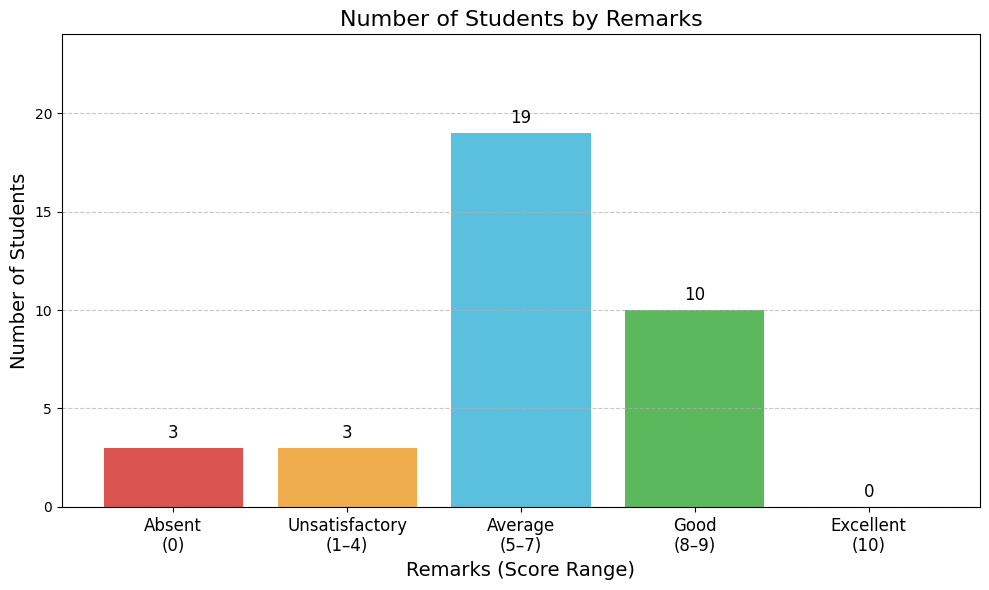

In [ ]:
import matplotlib.pyplot as plt

# Data
remarks = ['Absent', 'Unsatisfactory', 'Average', 'Good', 'Excellent']
student_counts = [3, 3, 19, 10, 0]
score_ranges = ['0', '1–4', '5–7', '8–9', '10']  # Corresponding score ranges

# Create custom x-tick labels with both remark and score range
xtick_labels = [f"{r}\n({s})" for r, s in zip(remarks, score_ranges)]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(remarks, student_counts, color=['#d9534f', '#f0ad4e', '#5bc0de', '#5cb85c', '#999999'])

# Replace x-tick labels with new ones
plt.xticks(ticks=range(len(remarks)), labels=xtick_labels, fontsize=12)

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, int(yval), ha='center', va='bottom', fontsize=12)

# Labels and title
plt.title('Number of Students by Remarks', fontsize=16)
plt.xlabel('Remarks (Score Range)', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.ylim(0, max(student_counts) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Filter students who scored zero
students_with_zero_score = df[df['Score'] == 0]['Full_Name']

# Display the result
print(students_with_zero_score)


17    Om Prakash Yadav
18      Roshan Jaiswal
34         Nitesh Raut
Name: Full_Name, dtype: object


In [ ]:
# Filter students who scored between 1 and 4 (inclusive)
students_with_low_scores = df[df['Score'].between(1, 4)][['Full_Name', 'Score']]

# Display the result
print(students_with_low_scores)


        Full_Name  Score
13  Sadique Akbar      4
15     Anju Yadav      3
16   Himal Pandey      4


In [ ]:
# Find unique section names in the overall DataFrame
sections = df['Section'].unique()

# Display the result
print(sections)

['C11' 'C12' 'c12']


In [ ]:
df['Section'] = df['Section'].str.upper()


In [ ]:
# Find unique section names in the overall DataFrame
sections = df['Section'].unique()

In [ ]:
sections

array(['C11', 'C12'], dtype=object)

In [ ]:
import pandas as pd

# 1. Average score per section
average_scores = df.groupby('Section')['Score'].mean()
print("Average Score per Section:")
print(average_scores)

# 2. Variance of scores per section
variance_scores = df.groupby('Section')['Score'].var()
print("\nVariance of Scores per Section:")
print(variance_scores)

# 3. Section with maximum variance
max_variance_section = variance_scores.idxmax()
max_variance_value = variance_scores.max()
print(f"\nSection with maximum variance: {max_variance_section} (Variance = {max_variance_value})")


Average Score per Section:
Section
C11    5.842105
C12    6.500000
Name: Score, dtype: float64

Variance of Scores per Section:
Section
C11    6.918129
C12    4.933333
Name: Score, dtype: float64

Section with maximum variance: C11 (Variance = 6.918128654970758)


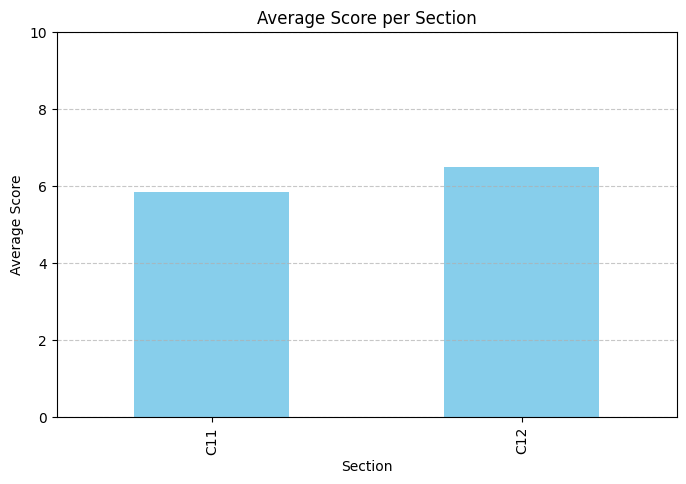

In [ ]:
import matplotlib.pyplot as plt

# Calculate average scores per section
average_scores = df.groupby('Section')['Score'].mean()

# Plotting
plt.figure(figsize=(8,5))
average_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Section')
plt.ylabel('Average Score')
plt.title('Average Score per Section')
plt.ylim(0, 10)  # Assuming scores are between 0 and 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-18-436502986.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


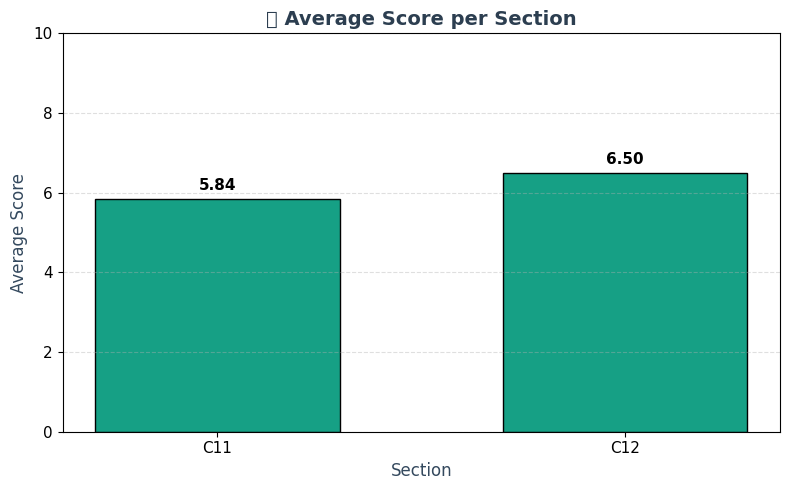

In [ ]:
import matplotlib.pyplot as plt

# Data
average_scores = {
    'C11': 5.842105,
    'C12': 6.500000
}

# Prepare data
sections = list(average_scores.keys())
scores = list(average_scores.values())

# Create figure
plt.figure(figsize=(8, 5))
bars = plt.bar(sections, scores, color='#16A085', width=0.6, edgecolor='black')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.15, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Styling
plt.title('📊 Average Score per Section', fontsize=14, fontweight='bold', color='#2C3E50')
plt.xlabel('Section', fontsize=12, color='#34495E')
plt.ylabel('Average Score', fontsize=12, color='#34495E')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Show chart
plt.show()
